# Covid-19 Pandemic Impact on Bikeshare at Boston
## by Hassan

## Investigation Overview

> Coronavirus has had a large-scale impact on transportation. This report attempts to assess the effects of COVID-19 on biking.<br><br>
We will focus on the impact of the Pandemic on two main variables:<br>
1-Total number of trips before and after the Pandemic<br>
2-The average trip duration befre and after the pendemic<br><br>
City uder study :<br>
Boston  - USA<br>
<br>
The study period was split into two phases:<br>
1- No COVID-19 phase at the secound quarted of 2019<br>
2- the initial wave of spreading the Pandmic secound quarter of 2020.<br><br>
The Original biking data extracted from https://www.bluebikes.com/system-data<br><br>


## Dataset Overview

> The dataset showing the information of more than one million bike share trips in Boston in two period of times<br>
Secound quarter of 2019 (No-Covid phase) and secound quareter of 2020 (The initial wave)<br><br>
consist of 14 column covering ( trip duration , trip distination , number of trips and user information)
distibuted in 1,026,065 rows
tripduration - quantitative continuous variable
the remaining columns are categorical nominal variable
('start station name','end station name', 'bikeid', 'usertype', 'birth year', 'gender','month', 'day', 'hour', 'year', 'Trip').

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('combinedf')
df_Q2_2019=pd.read_csv('2019df')
df_Q2_2020=pd.read_csv('2020df')

## The Distribution of the Trip's Duration 

> The distribution of the Trip duration take on a very wide range started from (one min) up to (27 Hours)<br>
Plotting on a logarithmic scale shows a normal distribution shape.<br>
Most of Trips was around 18 min.<br><br>
The plot shows that the number of trips before covid-19 was much heigher than the initial wave.<br>
Another interesting finding is the increase in the average trip duration during COVID-19 times. <br>

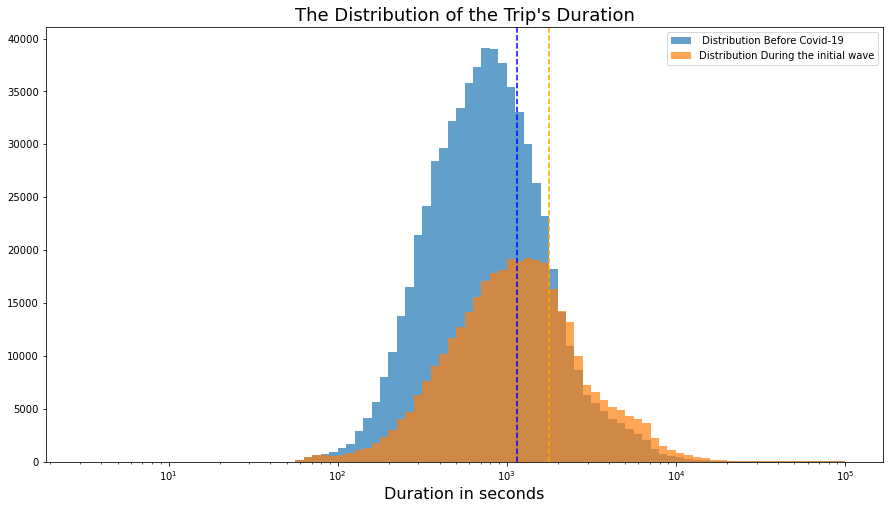

In [3]:
#Adjust bins for log transformation
log_binsize=0.05
bins =10** np.arange(0.5, np.log10(df['tripduration'].max())+ log_binsize, log_binsize)

#plot the figure
plt.figure(figsize=(15,8))
plt.hist(df_Q2_2019['tripduration'] , bins=bins , alpha = 0.7 , label=' Distribution Before Covid-19');
plt.hist(df_Q2_2020['tripduration'] , bins=bins , alpha=0.7 , label = 'Distribution During the initial wave');

#polish the figure
plt.title ('The Distribution of the Trip\'s Duration' , fontsize = 18);
plt.xlabel('Duration in seconds' , fontsize = 16);
plt.legend(loc='upper right')

#add vertical lines at the mean of distribution
plt.axvline(x=df_Q2_2019['tripduration'].mean() , c= 'blue' , ls = '--' ,label = 'Mean Trip Duration Before Pandemic')
plt.axvline(x=df_Q2_2020['tripduration'].mean() , c= 'orange' ,  ls = '--' , label = 'Mean Trip Duration In Pandemic')


plt.xscale('log')

## Variance Analysis in the Trip number before covid-19 and during the initial wave of the Pandemic

> Digging deeper to find the reason for the reduction in trip counts,<br> we will plot Bar-charts comparing the number of trips before and during the Pandemic as follow:<br>
Dependent variable : ( Total trip counts)<br>
Independent variables :(Month, Hour of the day, Gender (male or female), and User type(customer or subscriber))<br><br>
Observations:<br>
form Month plot: a big difference was shown in April at the very beginning of the spreading of the disease, I think the reason would be the panic situation of people<br>
from hour plot: we can a big difference at 8:00 am, that would be because of the lockdown and most of the people were working from home<br>
from user information plots: the Pandemic had a bigger impact on Males and Subscribers than on Females and Customers<br>

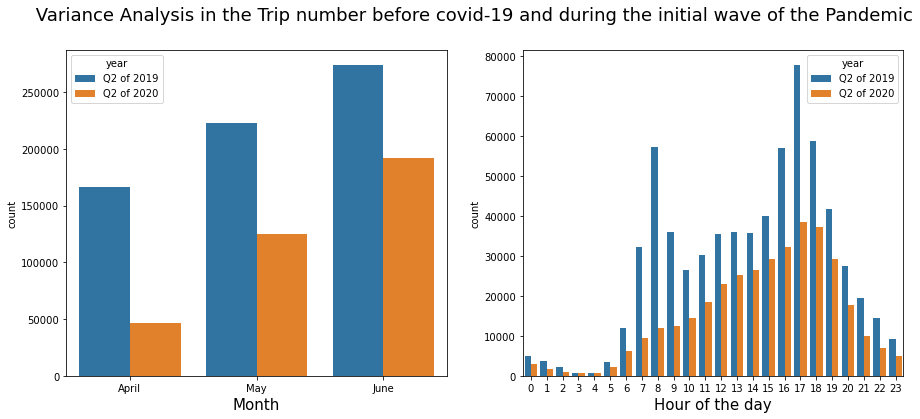

In [4]:
#plot the figure
fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = [15,6])

#Comparison count plots before and during the pandamic
sb.countplot(data = df , x = 'month' , hue = 'year' , ax=ax[0]);
ax[0].set_xlabel("Month" , fontsize=15)

sb.countplot(data = df , x = 'hour' , hue = 'year' , ax=ax[1]);
ax[1].set_xlabel("Hour of the day" , fontsize=15)


fig.suptitle(' Variance Analysis in the Trip number before covid-19 and during the initial wave of the Pandemic' , 
             fontsize = 18);

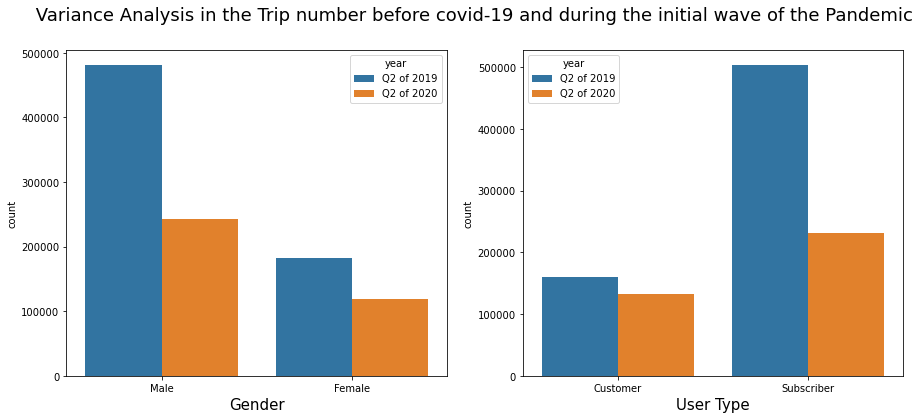

In [5]:
#plot the figure
fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = [15,6])

#Comparison count plots before and during the pandamic

sb.countplot(data = df , x = 'gender' , hue = 'year' , ax=ax[0]);
ax[0].set_xlabel("Gender" , fontsize=15)

sb.countplot(data = df , x = 'usertype' , hue = 'year' , ax=ax[1]);
ax[1].set_xlabel("User Type" , fontsize=15)

fig.suptitle(' Variance Analysis in the Trip number before covid-19 and during the initial wave of the Pandemic' , 
             fontsize = 18);

## Variance  in the Trip Duration per user type.
>Violin plot below was used to represent comparison of a trip duration distribution accross the user type(Customer or Subscriber)<br>
Trip duration on Y bar was converted to log ( duration) for more visibality<br>
Most of customer's trip have a longer duration more than the subscriber's trip.<br>



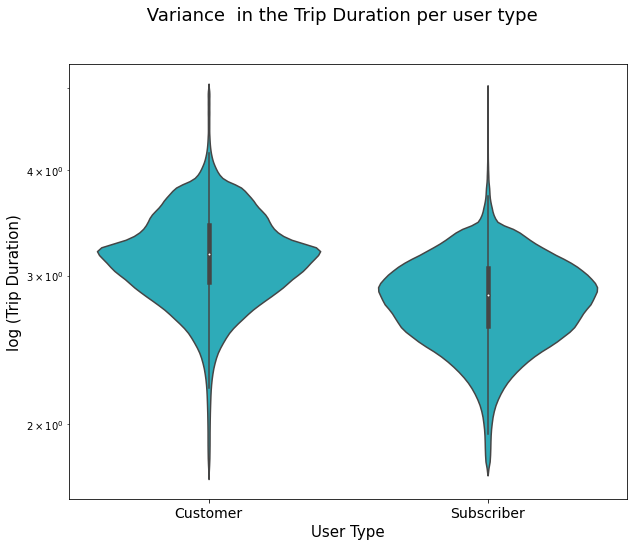

In [6]:
#fiunction for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

#Trasform the trip suration    
df['log_tripduration'] = df['tripduration'].apply(log_trans)

#Plot the figure
fig, ax = plt.subplots(figsize = [10,8])
ax = sb.violinplot(data = df, y = 'log_tripduration', x = 'usertype', color = sb.color_palette()[9]);

#polish the figure
plt.yscale('log')
ax.set_xticklabels(['Customer', 'Subscriber'] , fontsize = 14);
ax.set_xlabel("User Type",fontsize = 15);
ax.set_ylabel("log (Trip Duration)",fontsize = 15);

fig.suptitle(' Variance  in the Trip Duration per user type' , fontsize = 18);

## Comparison between average trip duration on total number of tips per user
>It's very interisting to find the negative relation between the number of trip and the average trip duration cross user type and user gender<br>
from the bar plot below we can note that the (Subscriber - Male) has the largest number of trips and the shortest average trip duration <br>
same apply on (Customer -  Female) as very few number of trips and the largest average trip duration <br>


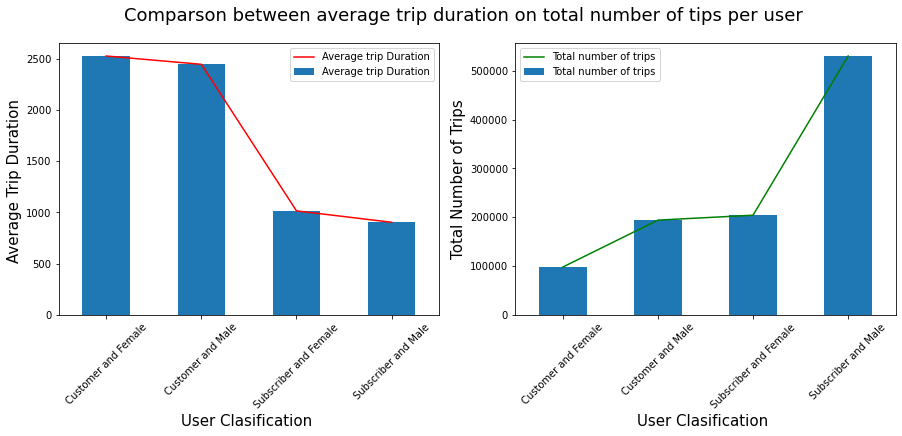

In [7]:
#craeat a new data frome combining the user type and user gender vs average trip duration and total trips 

#Data set user VS average trip duration
ug1 = df.groupby(['usertype','gender'])['tripduration'].mean().reset_index().rename(
    columns={'tripduration':'Average trip duration'})
#Data set user VS total trips
ug2 = df.groupby(['usertype','gender'])['tripduration'].count().reset_index().rename(
    columns={'tripduration':'Total number of trips'})
#combine the two data sets
ug2['Average trip Duration'] = ug1['Average trip duration']
ug2['user information'] =ug2['usertype'].str.cat(ug2['gender'].values.astype(str),sep=' and ')


#visulization
fig, axes = plt.subplots(ncols=2 , figsize = (15,5))
fig.suptitle('Comparson between average trip duration on total number of tips per user' , fontsize = 18 );
ug2.plot(x='user information' , y = 'Average trip Duration' , kind = 'bar' , rot = 45 , ax=axes[0]);
ug2.plot(x='user information' , y = 'Average trip Duration' , kind = 'line' , rot = 45 , ax=axes[0] , color = 'red');
ug2.plot(x='user information' , y = 'Total number of trips' , kind = 'bar' , rot = 45 , ax=axes[1]);
ug2.plot(x='user information' , y = 'Total number of trips' , kind = 'line' , rot = 45 , ax=axes[1] , color = 'green');


axes[0].set_xlabel("User Clasification ",fontsize = 15);
axes[0].set_ylabel("Average Trip Duration ",fontsize = 15);

axes[1].set_xlabel("User Clasification ",fontsize = 15);
axes[1].set_ylabel("Total Number of Trips",fontsize = 15);



## Comparson between average trip duration on total number of tips per user
>Instead of using just the average tip duration in the comparason the line chart below showing the number of trips per each trip duration cross the user type and user gender to verify the conclusion form the above bar-chart that (Subscriber - Male) has the largest number of trips and the shortest average trip duration and Customer -  Female) has very few number of trips and the largest average trip duration <br>

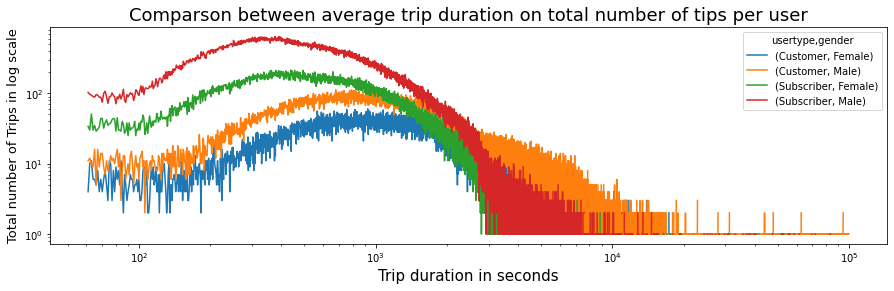

In [8]:
#create a pivot table showing each single tripduration per user
p=df.groupby(['usertype', 'tripduration' , 'gender']).size().reset_index().pivot(columns=['usertype' , 'gender'], index='tripduration', values=0)

#ploting the pivot in log scale
p.plot(figsize = (15,4))
plt.xscale('log');
plt.yscale('log');
plt.title('Comparson between average trip duration on total number of tips per user' , fontsize = 18);
plt.xlabel('Trip duration in seconds' , fontsize = 15);
plt.ylabel ('Total number of Trips in log scale' , fontsize = 13);

## Propability of Trip duration based on user type and user gender
>Point Plot below showing the propability of the trip duration based on the user type amd gender.<br>
Femal Customer is expected to has the longest trip duration<br>
however the subscriber Male has the shortest trip duration


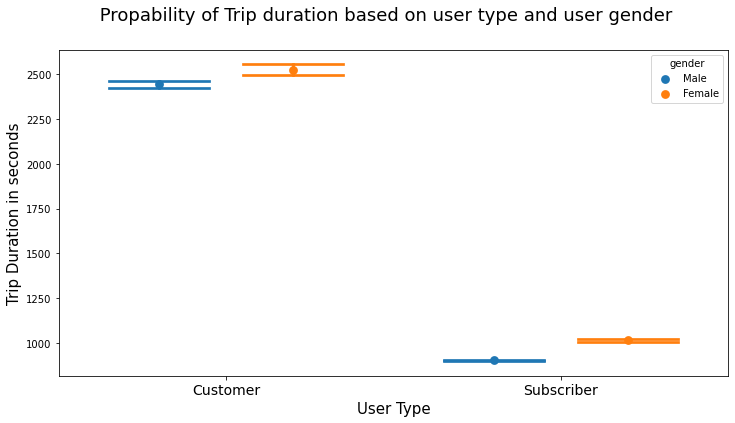

In [9]:
#point plot figure showing the average trip duration cross user type and gender 
fig, ax = plt.subplots( figsize = [12,6])
sb.pointplot(data = df, x = 'usertype', y = 'tripduration', hue = 'gender', hueorder = ['Male' , 'Female' ] , 
             linestyles = '', dodge = 0.4 , capsize=0.3)

#polish
ax.set_xticklabels(['Customer', 'Subscriber'] , fontsize = 14)
ax.set_xlabel("User Type",fontsize = 15)
ax.set_ylabel("Trip Duration in seconds",fontsize = 15)

fig.suptitle(' Propability of Trip duration based on user type and user gender' , fontsize = 18);

## Thank you